# Alberi di decisione
Per prima cosa importiamo tutte le librerie che possono servici

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import graphviz
!pip install missingpy
import missingpy

     |████████████████████████████████| 49 kB 4.0 MB/s 


In Python è semplice costruire un albero di decisione, in quanto con la libreria tree abbiammo un metodo chiamato `DecisionTreeClassifier`.

In [ ]:
iris=load_iris()
X=iris.data
y=iris.target

tree_clf=DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

Qui visualizziamo l'albero costruito.

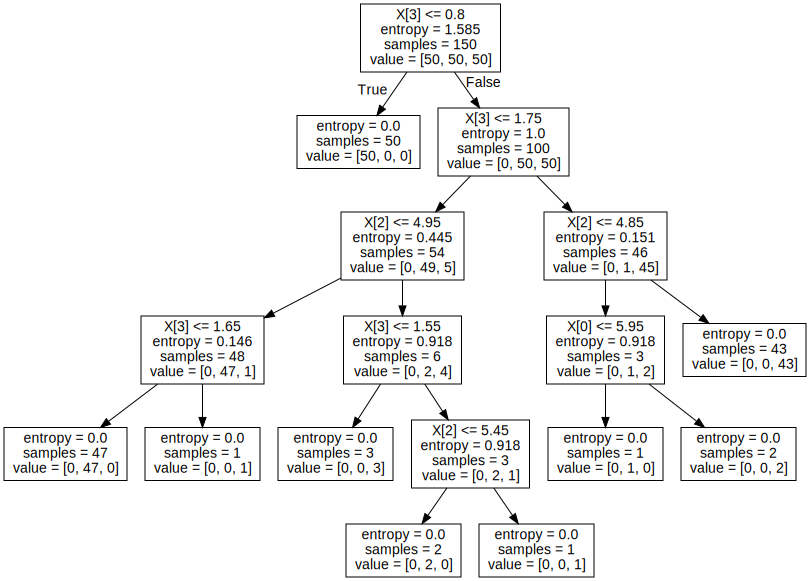

In [ ]:
dot_data=tree.export_graphviz(tree_clf, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("iris")
graph

Con il modulo graphviz possiamo personalizzare graficamente l'albero in modo che sia il più leggibile possibile.

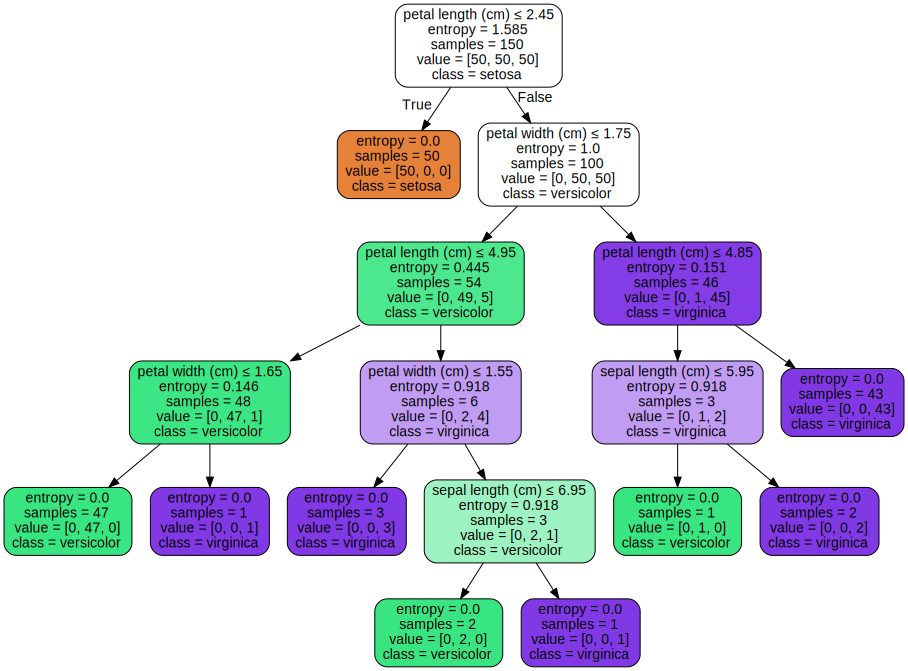

In [ ]:
dot_data=tree.export_graphviz(tree_clf, out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("iris_color")
graph

Analizziamo la radice: 
 

*   come condizione di split ha utilizzato "**petal width (cm)≤0.8**". Se questa condizione è vera allora si va nel ramo di sinistra, altrimenti nel ramo di destra.
*   Come indice abbiamo usato l'**entropia**.
* Per **samples** si intendono i campioni che appartengono, al momento della decisione, a quel nodo. Nel caso della radice sono compresi tutti.
* Il **value** indica quanti campioni di un dato nodo rientrano in ogni categoria. In questo caso abbiamo 50 per setosa, 50 per versicolor e 50 per virginica.
* La **classe** indica il target di appartenenza dei campioni, in quel nodo.



# Random Forest
Iniziamo importando il dataset da sckit-learn, e carica l'iris dataset con `load_iris()`.

In [ ]:
#Import sckit-learn dataset library
from sklearn.datasets import load_iris

#Load dataset
iris=load_iris()

Possiamo farci stampare i target e i feature names, per assicurarci che abbiamo il giusto dataset.

In [ ]:
#Print the label species (setosa, versicolor, virginica)
print(iris.target_names)

#Print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


è una buona idea esplorare il proprio dataset, poco alla volta, così sai con cosa stai lavorando. Qui, si può vedere le prime 5 righe del dataset.


In [ ]:
#print the iris data (top 5 records)
print(iris.data[:5])

#print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Possiamo creare un DataFrame dell'iris dataset nel seguente modo:

In [ ]:
import pandas as pd
data=pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Innanzitutto, bisogna separare le colonne tra variabili dipendenti e indipendenti (oppure feature e labels). Dopo bisogna separare queste variabili tra set di training e test.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #Features
y=data['species'] #Labels

#Split dataset into training set and test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3) #70% training e 30% test

Dopo aver separato, bisognerebbe allenare il modello sul training set e performare le predizioni sul test set.

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

Dopo avere fatto il training, controlliamo l'accuratezza usando valori effettivi e previsti.

In [ ]:
#Import sckit-learn metrics module for accuracy calculation
from sklearn import metrics
#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


Possiamo fare delle predizioni anche per il singolo oggetto, per esempio:


*   sepal length = 3
*   sepal width = 5
*   petal length = 4
*   petal width = 2

Ora si può predire che tipo di fiore è.

In [ ]:
clf.predict([[3,4,5,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

Ecco, ha predetto che è un Virginica.

## Trovare caratteristiche importanti in Scikit-learn
Qui trovi caratteristiche importanti o caratteristiche selezionate nel set di dati IRIS. In scikit-learn, puoi eseguire questo task nei seguenti passaggi:



*   Innanzitutto, è necessario creare un modello di Random Forest.
*   In secondo luogo, utilizzare la caratteristica della variabile di importanza per vedere i punteggi della caratteristica d'importanza.
*   In terzo luogo, visualizza questi punteggi usando la libreria Seaborn.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.475020
petal length (cm)    0.384361
sepal length (cm)    0.104895
sepal width (cm)     0.035724
dtype: float64

Si può anche visualizzare l'importanza della caratteristica. Le visualizzazioni sono facili da capire e interpretabili.

Per la visualizzazione, si può utilizzare una combinazione di matplotlib e seaborn. Poiché seaborn è costruito su matplotlib, offre una serie di temi personalizzati e fornisce tipi di trama aggiuntivi. Matplotlib è un superset di Seaborn ed entrambi sono ugualmente importanti per una buona visualizzazione.

No handles with labels found to put in legend.


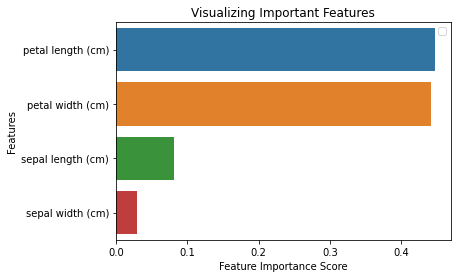

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Generare un modello su caratteristiche scelte
Si può rimuovere la caratteristica "sepal width" perchè, come si può vedere dal grafico sopra riportato, ha una importanza davvero bassa, e quindi possiamo scegliere una delle 3 caratteristiche rimanenti.


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

Dopo aver diviso, si può generare un modello su le caratteristiche scelte, 
eseguire previsioni sulle caratteristiche del test set selezionato e confrontare i valori effettivi e previsti.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


# MissForest
Lavoreremo con il set di dati Iris per la parte pratica. Il set di dati non contiene valori mancanti, ma questo è il punto. Produrremo i valori mancanti in modo casuale, in modo da poter valutare successivamente le prestazioni dell'algoritmo MissForest.

Importiamo Numpy e Pandas e leggiamo nel set di dati Iris menzionato. Faremo anche una **copia** del set di dati in modo da poter valutare con valori reali in seguito:


In [ ]:
import numpy as np
import pandas as pd

iris = pd.read_csv('iris.csv')

# Keep an untouched copy for later
iris_orig = iris.copy()

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Ora creiamo due elenchi di numeri casuali univoci che vanno da zero alla lunghezza del dataset di Iris. Con alcune manipolazioni di Pandas, sostituiremo i valori di `sepal.length` e `petal.width` con NaN, in base alle posizioni dell'indice generate casualmente:

In [ ]:
# Generate unique lists of random integers
inds1 = list(set(np.random.randint(0, len(iris), 10)))
inds2 = list(set(np.random.randint(0, len(iris), 15)))

# Replace the values at given index position with NaNs
iris['sepal.length'] = [val if i not in inds1 else np.nan for i, val in enumerate(iris['sepal.length'])]
iris['petal.width'] = [val if i not in inds2 else np.nan for i, val in enumerate(iris['petal.width'])]

# Get count of missing values by column
iris.isnull().sum()

sepal.length    10
sepal.width      0
petal.length     0
petal.width     15
variety          0
dtype: int64

Come puoi vedere, `petal.width` contiene solo 15 valori mancanti. Questo perché il processo di randomizzazione ha creato due numeri casuali identici. Non ci pone alcun problema, poiché alla fine il numero di valori mancanti è arbitrario.

Il passo successivo è eseguire l'imputazione. Dovremmo rimuovere anche la **variabile di destinazione** dall'immagine. Ecco come:

In [ ]:
from missingpy import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
X = iris.drop('variety', axis=1)
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 3


E questo è tutto: i valori mancanti vengono ora imputati!

Ma come la valutiamo?

## Valutazione MissForest
Per eseguire la valutazione, utilizzeremo il nostro set di dati copiato e non modificato. Aggiungeremo due colonne aggiuntive che rappresentano le colonne assegnate dall'algoritmo MissForest, sia per `sepal.length` che `petal.width`.

Creeremo quindi un **nuovo set di dati** contenente solo queste due colonne, nello stato originale e in quello assegnato. Infine, calcoleremo gli errori assoluti per un'ulteriore ispezione.

Ecco il codice:



In [ ]:
# Add imputed values as columns to the untouched dataset
iris_orig['MF_sepal_length'] = X_imputed[:, 0]
iris_orig['MF_petal_width'] = X_imputed[:, -1]
comparison_df = iris_orig[['sepal.length', 'MF_sepal_length', 'petal.width', 'MF_petal_width']]

# Calculate absolute errors
comparison_df['ABS_ERROR_sepal_length'] = np.abs(comparison_df['sepal.length'] - comparison_df['MF_sepal_length'])
comparison_df['ABS_ERROR_petal_width'] = np.abs(comparison_df['petal.width'] - comparison_df['MF_petal_width'])

# Show only rows where imputation was performed
comparison_df.iloc[sorted([*inds1, *inds2])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal.length,MF_sepal_length,petal.width,MF_petal_width,ABS_ERROR_sepal_length,ABS_ERROR_petal_width
12,4.8,4.762,0.1,0.265500,0.038,0.165500
12,4.8,4.762,0.1,0.265500,0.038,0.165500
15,5.7,5.700,0.4,0.200000,0.000,0.200000
29,4.7,4.700,0.2,0.213000,0.000,0.013000
33,5.5,5.500,0.2,0.215700,0.000,0.015700
53,5.5,5.847,1.3,1.300000,0.347,0.000000
55,5.7,5.700,1.3,1.476000,0.000,0.176000
59,5.2,5.200,1.4,1.199000,0.000,0.201000
73,6.1,6.100,1.2,1.453000,0.000,0.253000
78,6.0,6.000,1.5,1.478000,0.000,0.022000


Come puoi vedere, l'ultima riga di codice seleziona solo quelle righe su cui è stata eseguita l'assegnazione.
Tutti gli errori assoluti sono piccoli e rientrano in una singola deviazione standard dalla media dell'originale. Il valore imputato sembra naturale se non si tiene conto delle cifre decimali aggiunte. Questo può essere facilmente risolto se necessario.